In [1]:
#Date library
import datetime as dt

#Linear Algebra
import numpy as np

#Data preprocessing
import pandas as pd

#Data splitting into train/test
from sklearn.model_selection import train_test_split

#Search for the best hyperparameter
from sklearn.model_selection import GridSearchCV

#Catboost Regression Algorithm
from catboost import CatBoostRegressor

#Matlab style plotting
from matplotlib import pyplot as plt
%matplotlib inline

#Advance style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import scipy.stats as stats

# Reading the datasets

In [2]:
test = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\riders\Test.csv', encoding='utf-8')
riders = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\riders\Riders.csv', encoding='utf-8')
definitions = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\riders\VariableDefinitions.csv')

In [3]:
data = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\zindi\riders\Train.csv', encoding ='utf-8');data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


# joining in the wholedatasets

In [4]:
ntrain = data.shape[0]
ntest = test.shape[0]

all_data = pd.concat((data, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (28269, 29)


In [5]:
all_data.columns = ['Arrival at Destination - Day of Month',
       'Arrival at Destination - Time',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Time', 'Confirmation - Weekday (Mo = 1)',
       'Latitude', 'Longitude', 'Distance (KM)', 'Order No',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'latitude2', 'longitude',
       'Placement - Day of Month', 'Placement - Time',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Rider Id', 'Temperature',
       'Time from Pickup to Arrival', 'User Id', 'Vehicle Type']

In [6]:
all_data['pickup_datetime'] = pd.to_datetime(all_data['Placement - Time'])
all_data.loc[:, 'pickup_date'] = all_data['pickup_datetime'].dt.date
all_data['dropoff_datetime'] = pd.to_datetime(all_data['Confirmation - Time'])
all_data['check_trip_duration12'] = (all_data['dropoff_datetime'] - all_data['pickup_datetime']).map(lambda x: x.total_seconds())
# duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
# print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')
all_data.drop(["dropoff_datetime","pickup_date","pickup_datetime"],axis =1,inplace = True)

In [7]:
all_data['pickup_datetime'] = pd.to_datetime(all_data['Pickup - Time'])
all_data.loc[:, 'pickup_date'] = all_data['pickup_datetime'].dt.date
all_data['dropoff_datetime'] = pd.to_datetime(all_data['Arrival at Pickup - Time'])
all_data['check_trip_duration'] = (all_data['dropoff_datetime'] - all_data['pickup_datetime']).map(lambda x: x.total_seconds())
# duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
# print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')
all_data.drop(["dropoff_datetime","pickup_date","pickup_datetime"],axis =1,inplace = True)

In [8]:
all_data.drop(["Arrival at Destination - Day of Month","Arrival at Destination - Weekday (Mo = 1)","Arrival at Destination - Time"],axis = 1,inplace =True)

In [9]:
all_data.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Order No,...,Placement - Weekday (Mo = 1),Platform Type,Precipitation in millimeters,Rider Id,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,check_trip_duration12,check_trip_duration
0,9,10:04:47 AM,5,9,9:40:10 AM,5,-1.300406,36.829741,4,Order_No_4211,...,5,3,NaN,Rider_Id_432,20.4,745.0,User_Id_633,Bike,264.0,-1363.0
1,12,11:40:22 AM,5,12,11:23:21 AM,5,-1.295004,36.814358,16,Order_No_25375,...,5,3,NaN,Rider_Id_856,26.4,1993.0,User_Id_2285,Bike,425.0,-227.0
2,30,12:49:34 PM,2,30,12:42:44 PM,2,-1.300921,36.828195,3,Order_No_1899,...,2,3,NaN,Rider_Id_155,NaN,455.0,User_Id_265,Bike,199.0,-209.0
3,15,9:37:56 AM,5,15,9:26:05 AM,5,-1.257147,36.795063,9,Order_No_9336,...,5,3,NaN,Rider_Id_855,19.2,1341.0,User_Id_1402,Bike,31.0,-310.0
4,13,10:03:53 AM,1,13,9:56:18 AM,1,-1.295041,36.809817,9,Order_No_27883,...,1,1,NaN,Rider_Id_770,15.4,1214.0,User_Id_1737,Bike,60.0,-90.0


In [10]:
all_data.check_trip_duration  = np.abs(all_data.check_trip_duration)

In [11]:
all_data['tripping '] = all_data.check_trip_duration + all_data.check_trip_duration12

In [12]:
all_data["checkkk"] = all_data.check_trip_duration**(1/3)

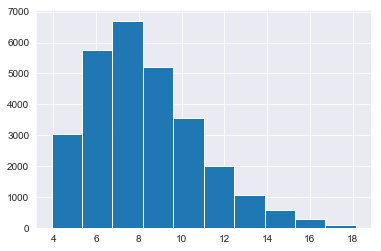

In [13]:
(all_data.check_trip_duration**(1/3)).hist()

In [14]:
all_data.drop('check_trip_duration',axis = 1,inplace = True)

In [15]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [16]:
all_data.shape

(28269, 29)

In [17]:
all_data = pd.merge(all_data,riders,how = 'left',on = ['Rider Id'])

In [18]:
all_data.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Order No,...,Time from Pickup to Arrival,User Id,Vehicle Type,check_trip_duration12,tripping,checkkk,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,9,10:04:47 AM,5,9,9:40:10 AM,5,-1.300406,36.829741,4,Order_No_4211,...,745.0,User_Id_633,Bike,264.0,1627.0,11.087457,1637,1309,13.8,549
1,12,11:40:22 AM,5,12,11:23:21 AM,5,-1.295004,36.814358,16,Order_No_25375,...,1993.0,User_Id_2285,Bike,425.0,652.0,6.100170,396,339,13.6,69
2,30,12:49:34 PM,2,30,12:42:44 PM,2,-1.300921,36.828195,3,Order_No_1899,...,455.0,User_Id_265,Bike,199.0,408.0,5.934472,1023,242,12.5,114
3,15,9:37:56 AM,5,15,9:26:05 AM,5,-1.257147,36.795063,9,Order_No_9336,...,1341.0,User_Id_1402,Bike,31.0,341.0,6.767899,886,283,14.5,113
4,13,10:03:53 AM,1,13,9:56:18 AM,1,-1.295041,36.809817,9,Order_No_27883,...,1214.0,User_Id_1737,Bike,60.0,150.0,4.481405,2311,872,14.1,533


In [19]:
all_data.isnull().sum()

Arrival at Pickup - Day of Month            0
Arrival at Pickup - Time                    0
Arrival at Pickup - Weekday (Mo = 1)        0
Confirmation - Day of Month                 0
Confirmation - Time                         0
Confirmation - Weekday (Mo = 1)             0
Latitude                                    0
Longitude                                   0
Distance (KM)                               0
Order No                                    0
Personal or Business                        0
Pickup - Day of Month                       0
Pickup - Time                               0
Pickup - Weekday (Mo = 1)                   0
latitude2                                   0
longitude                                   0
Placement - Day of Month                    0
Placement - Time                            0
Placement - Weekday (Mo = 1)                0
Platform Type                               0
Precipitation in millimeters            27518
Rider Id                          

# checking the distribution of the datasets

In [20]:
from numba import jit
from collections import defaultdict, Counter

In [21]:
all_data.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Order No,...,Time from Pickup to Arrival,User Id,Vehicle Type,check_trip_duration12,tripping,checkkk,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,9,10:04:47 AM,5,9,9:40:10 AM,5,-1.300406,36.829741,4,Order_No_4211,...,745.0,User_Id_633,Bike,264.0,1627.0,11.087457,1637,1309,13.8,549
1,12,11:40:22 AM,5,12,11:23:21 AM,5,-1.295004,36.814358,16,Order_No_25375,...,1993.0,User_Id_2285,Bike,425.0,652.0,6.100170,396,339,13.6,69
2,30,12:49:34 PM,2,30,12:42:44 PM,2,-1.300921,36.828195,3,Order_No_1899,...,455.0,User_Id_265,Bike,199.0,408.0,5.934472,1023,242,12.5,114
3,15,9:37:56 AM,5,15,9:26:05 AM,5,-1.257147,36.795063,9,Order_No_9336,...,1341.0,User_Id_1402,Bike,31.0,341.0,6.767899,886,283,14.5,113
4,13,10:03:53 AM,1,13,9:56:18 AM,1,-1.295041,36.809817,9,Order_No_27883,...,1214.0,User_Id_1737,Bike,60.0,150.0,4.481405,2311,872,14.1,533


In [22]:
all_data['user_id_count'] = all_data['User Id'].map(Counter(all_data['User Id']))
from numba import jit
from collections import defaultdict, Counter

In [23]:
len(all_data[all_data['User Id'] == 'User_Id_633'])

233

In [24]:
all_data['riderid_count'] = all_data['Rider Id'].map(Counter(all_data['Rider Id']))


In [25]:
#train['Temperature'].fillna(train.groupby('Platform Type')['Temperature'].transform('median'), inplace=True)
all_data['Precipitation in millimeters'].fillna(all_data.groupby('Platform Type')['Precipitation in millimeters'].transform('median'), inplace=True)
#test['Temperature'].fillna(test.groupby('Platform Type')['Temperature'].transform('median'), inplace=True)
#test['Precipitation in millimeters'].fillna(test.groupby('Platform Type')['Precipitation in millimeters'].transform('median'), inplace=True)

In [26]:
def rainfall(x):
    if x < 1:
        return 0
    elif x == 1:
        return 0
    elif x > 1 and x <= 5:
        return 1
    elif  x > 5 and x <= 10 :
        return 2
    else:
        return 3
all_data['rainfall'] = all_data['Precipitation in millimeters'].apply(rainfall)
nyc =all_data[['Precipitation in millimeters','rainfall']]

In [27]:
all_data.drop(['Temperature','User Id'],axis =1,inplace =True)

In [28]:
import datetime

In [29]:
all_data['Arrival at Pickup - Time'] = pd.to_datetime(all_data['Arrival at Pickup - Time'])

In [30]:
all_data['rhour'] = all_data['Arrival at Pickup - Time'].dt.hour

In [31]:
all_data['sec'] = all_data['Arrival at Pickup - Time'].dt.second

In [32]:
all_data['min'] = all_data['Arrival at Pickup - Time'].dt.minute

In [33]:
all_data['ampmconfirm'] = all_data['Confirmation - Time'].astype('str').apply(lambda x:x.split(' ')[-1])

In [34]:
all_data['Confirmation - Time'] = pd.to_datetime(all_data['Confirmation - Time'])

In [35]:
all_data['chour'] = all_data['Confirmation - Time'].dt.hour

In [36]:
all_data['cmin'] = all_data['Confirmation - Time'].dt.minute
all_data['csec'] = all_data['Confirmation - Time'].dt.second

In [37]:
all_data.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Order No,...,user_id_count,riderid_count,rainfall,rhour,sec,min,ampmconfirm,chour,cmin,csec
0,9,2019-11-10 10:04:47,5,9,2019-11-10 09:40:10,5,-1.300406,36.829741,4,Order_No_4211,...,233,30,1,10,47,4,AM,9,40,10
1,12,2019-11-10 11:40:22,5,12,2019-11-10 11:23:21,5,-1.295004,36.814358,16,Order_No_25375,...,11,51,1,11,22,40,AM,11,23,21
2,30,2019-11-10 12:49:34,2,30,2019-11-10 12:42:44,2,-1.300921,36.828195,3,Order_No_1899,...,217,133,1,12,34,49,PM,12,42,44
3,15,2019-11-10 09:37:56,5,15,2019-11-10 09:26:05,5,-1.257147,36.795063,9,Order_No_9336,...,96,126,1,9,56,37,AM,9,26,5
4,13,2019-11-10 10:03:53,1,13,2019-11-10 09:56:18,1,-1.295041,36.809817,9,Order_No_27883,...,1,104,1,10,53,3,AM,9,56,18


In [38]:
all_data.drop(['Arrival at Pickup - Time','Confirmation - Time'],axis = 1,inplace = True)

In [39]:
all_data.drop('Order No',axis =1,inplace = True)

In [40]:
all_data.isnull().sum()

Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Latitude                                   0
Longitude                                  0
Distance (KM)                              0
Personal or Business                       0
Pickup - Day of Month                      0
Pickup - Time                              0
Pickup - Weekday (Mo = 1)                  0
latitude2                                  0
longitude                                  0
Placement - Day of Month                   0
Placement - Time                           0
Placement - Weekday (Mo = 1)               0
Platform Type                              0
Precipitation in millimeters               0
Rider Id                                   0
Time from Pickup to Arrival             7068
Vehicle Type                               0
check_trip_duration12                      0
tripping  

In [41]:
import math

In [42]:
from math import sin, cos, sqrt, atan2
def calculate_distance(Latitude, Longitude, latitude2, longitude):
    R = 6373.0

    Latitude = np.radians(Latitude)
    Longitude = np.radians(Longitude)
    latitude2 = np.radians(latitude2)
    longitude = np.radians(longitude)

    dlon = longitude - Longitude
    dlat = latitude2 - Latitude

    a = np.sin(dlat / 2)**2 + np.cos(Latitude) * np.cos(latitude2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

In [43]:
all_data['distance'] = calculate_distance(**all_data[['Latitude', 'Longitude', 'latitude2', 'longitude']])

In [44]:
all_data['d-d'] = all_data['Distance (KM)'] - all_data.distance

In [45]:
all_data['latlong2'] = all_data.latitude2 + all_data.longitude

In [46]:
all_data['latlong'] = all_data.Latitude +all_data.Longitude

In [47]:
all_data['orderedtransformed'] = all_data.No_Of_Orders**(1/5.1)

In [48]:
all_data['averageRating'] = all_data.Average_Rating**(1/0.5)

In [49]:
all_data['age_tranformed'] = all_data.Age**(1/4)

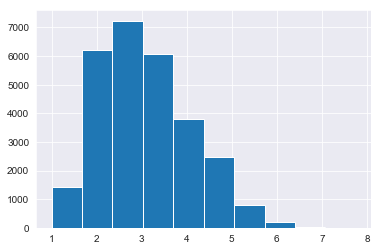

In [50]:
(all_data['Distance (KM)']**(1/1.9)).hist()

In [51]:
all_data['distanceinkmtransformed'] = all_data['Distance (KM)']**(1/1.9)

In [52]:
all_data.fillna(0,inplace = True)

In [53]:
all_data.columns

Index(['Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Latitude', 'Longitude',
       'Distance (KM)', 'Personal or Business', 'Pickup - Day of Month',
       'Pickup - Time', 'Pickup - Weekday (Mo = 1)', 'latitude2', 'longitude',
       'Placement - Day of Month', 'Placement - Time',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Rider Id',
       'Time from Pickup to Arrival', 'Vehicle Type', 'check_trip_duration12',
       'tripping ', 'checkkk', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'user_id_count', 'riderid_count', 'rainfall', 'rhour',
       'sec', 'min', 'ampmconfirm', 'chour', 'cmin', 'csec', 'distance', 'd-d',
       'latlong2', 'latlong', 'orderedtransformed', 'averageRating',
       'age_tranformed', 'distanceinkmtransformed'],
      dtype='object')

In [54]:
all_data.drop(['Pickup - Time','Placement - Time','Rider Id'],axis =1,inplace = True)

In [55]:
all_data = pd.get_dummies(all_data)

In [56]:
# remove constant features
[feat for feat in all_data.columns if all_data[feat].std() == 0]


['Vehicle Type_Bike']

In [57]:
all_data.drop(['Vehicle Type_Bike'], axis = 1,inplace = True)

In [58]:
#Get the new dataset
data = all_data[:ntrain]
test = all_data[ntrain:]

In [59]:
data.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Pickup - Day of Month,Pickup - Weekday (Mo = 1),latitude2,...,latlong2,latlong,orderedtransformed,averageRating,age_tranformed,distanceinkmtransformed,Personal or Business_Business,Personal or Business_Personal,ampmconfirm_AM,ampmconfirm_PM
0,9,5,9,5,-1.300406,36.829741,4,9,5,-1.317755,...,35.512616,35.529335,4.267815,190.44,6.014990,2.074310,1,0,1,0
1,12,5,12,5,-1.295004,36.814358,16,12,5,-1.351453,...,35.547862,35.519354,3.231112,184.96,4.290915,4.302762,0,1,1,0
2,30,2,30,2,-1.300921,36.828195,3,30,2,-1.308284,...,35.535135,35.527274,3.891990,156.25,3.944154,1.782857,1,0,0,1
3,15,5,15,5,-1.257147,36.795063,9,15,5,-1.281301,...,35.551095,35.537916,3.783800,210.25,4.101537,3.178578,1,0,1,0
4,13,1,13,1,-1.295041,36.809817,9,13,1,-1.266597,...,35.525521,35.514776,4.566344,198.81,5.434119,3.178578,0,1,1,0


In [60]:
test.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Latitude,Longitude,Distance (KM),Pickup - Day of Month,Pickup - Weekday (Mo = 1),latitude2,...,latlong2,latlong,orderedtransformed,averageRating,age_tranformed,distanceinkmtransformed,Personal or Business_Business,Personal or Business_Personal,ampmconfirm_AM,ampmconfirm_PM
21201,27,3,27,3,-1.305249,36.822390,8,27,3,-1.333275,...,35.537540,35.517141,3.297086,176.89,6.234708,2.987518,1,0,0,1
21202,17,5,17,5,-1.277007,36.823907,5,17,5,-1.272639,...,35.522084,35.546900,3.366210,207.36,4.064814,2.332808,1,0,0,1
21203,27,4,27,4,-1.276574,36.851365,5,27,4,-1.290894,...,35.532077,35.574791,3.738312,171.61,4.631157,2.332808,1,0,1,0
21204,17,1,17,1,-1.303382,36.790658,5,17,1,-1.290503,...,35.519143,35.487276,3.364856,187.69,4.864599,2.332808,1,0,0,1
21205,11,2,11,2,-1.266467,36.792161,6,11,2,-1.281081,...,35.533342,35.525694,5.261593,198.81,5.785015,2.567753,1,0,1,0


In [61]:
test.drop("Time from Pickup to Arrival",axis = 1,inplace = True)

In [62]:
sample = pd.read_csv(r"C:\Users\ABOFFICIAL\Desktop\zindi\riders\SampleSubmission.csv")
sample.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [63]:
data.columns

Index(['Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Latitude', 'Longitude',
       'Distance (KM)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'latitude2', 'longitude', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Time from Pickup to Arrival',
       'check_trip_duration12', 'tripping ', 'checkkk', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'user_id_count', 'riderid_count',
       'rainfall', 'rhour', 'sec', 'min', 'chour', 'cmin', 'csec', 'distance',
       'd-d', 'latlong2', 'latlong', 'orderedtransformed', 'averageRating',
       'age_tranformed', 'distanceinkmtransformed',
       'Personal or Business_Business', 'Personal or Business_Personal',
       'ampmconfirm_AM', 'ampmconfirm_PM'],
      dtype='object')

In [64]:
#model = BinaryRelevance(LogisticRegression())
#from sklearn.tree import DecisionTreeClassifier 
#dtree_model = DecisionTreeClassifier(max_depth = 2)
#mod = XGBClassifier(n_estimators= 200, max_depth=5)
# from lightgbm import LGBMClassifier
#model = XGBClassifier(n_estimators= 500,max_depth= 5, gamma=1)
#model = XGBClassifier(n_estimators= 200, max_depth=5)
#1.33680339327269
#import xgboost as xgb

In [65]:
#rf = XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
#from xgboost import XGBRegressor

In [66]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dvalid = xgb.DMatrix(X_test, label=y_test)
# dtest = xgb.DMatrix(test[feature_names].values)
#watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
#xgb_pars = {'objective':'reg:linear'
 #           , 'booster':'gbtree'
#            ,'eval_metric':'rmse'
  #          ,'seed' : 1978
   #         ,'max_depth':6
    #        ,'num_boost_round':1000
     #       ,'min_child_weight': 7
      #      ,'eta': 0.1 
       #     ,'subsample': 0.7
        #    ,'colsample_bytree': 0.8
         #   ,'lambda': 2
          #  ,'silent': 1,'n_estimators':265
           #  }   

In [67]:
import sklearn

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
from math import sqrt

In [70]:
#pred = model.predict(X_test)
#sqrt(mean_squared_error(y_test,pred))

In [71]:
#pred = model.predict_proba(X_test)
#log_loss(y_test,pred)

# Features importance

In [72]:
#import matplotlib.pyplot as plt
#xgb.plot_importance(model,max_num_features=10)
#plt.rcParams['figure.figsize'] = [15, 5]

In [73]:
from catboost import CatBoostRegressor
import catboost
model = CatBoostRegressor(iterations=600,
                              learning_rate=0.1,
                              depth=4,
                             l2_leaf_reg=10,
                             bootstrap_type='Bernoulli',
                              subsample=0.7,
                              #leaf_estimation_iterations=10,
                              metric_period=20,
                              #od_type='Iter',
                              #od_wait=45,
                              random_seed=42,
                              allow_writing_files=False)

# Getting predictions by fitting the whole data

In [74]:
model.fit(data.drop(['Time from Pickup to Arrival'], axis =1), data['Time from Pickup to Arrival'])

0:	learn: 1703.9351678	total: 272ms	remaining: 2m 42s
20:	learn: 814.6567393	total: 2.1s	remaining: 58.1s
40:	learn: 769.4843511	total: 3.94s	remaining: 53.7s
60:	learn: 760.0861790	total: 5.69s	remaining: 50.3s
80:	learn: 753.9929576	total: 7.44s	remaining: 47.7s
100:	learn: 747.5747432	total: 9.2s	remaining: 45.5s
120:	learn: 742.9874940	total: 11s	remaining: 43.4s
140:	learn: 738.3961522	total: 12.7s	remaining: 41.4s
160:	learn: 734.5238570	total: 14.5s	remaining: 39.5s
180:	learn: 731.5735955	total: 16.2s	remaining: 37.6s
200:	learn: 728.4302727	total: 18.2s	remaining: 36.1s
220:	learn: 725.5753536	total: 20.7s	remaining: 35.4s
240:	learn: 723.2845598	total: 22.5s	remaining: 33.5s
260:	learn: 721.0742506	total: 24.4s	remaining: 31.7s
280:	learn: 719.1339440	total: 26.4s	remaining: 30s
300:	learn: 717.2855755	total: 28.2s	remaining: 28s
320:	learn: 715.4205767	total: 29.9s	remaining: 26s
340:	learn: 713.5127973	total: 31.7s	remaining: 24.1s
360:	learn: 711.7173067	total: 33.5s	remai

In [75]:
model.predict(test)


array([1556.42286529, 1373.4480996 , 1557.90346478, ..., 1580.79263387,
       2597.15415862, 1719.50548997])

In [76]:
pred = pd.DataFrame(model.predict(test),columns= ['Time from Pickup to Arrival' ])

In [77]:
pred = pd.concat([sample['Order_No'], pred], axis =1)

In [78]:
#pred  =np.round(pred,3)
pred.head()


,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1556.422865
1,Order_No_12736,1373.448100
2,Order_No_768,1557.903465
3,Order_No_15332,1023.135806
4,Order_No_21373,1164.221637


In [79]:
pred  = pred.round()

In [80]:
pred.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1556.0
1,Order_No_12736,1373.0
2,Order_No_768,1558.0
3,Order_No_15332,1023.0
4,Order_No_21373,1164.0


In [81]:
pred.to_csv("engineer6.csv", index = False)